In [1]:
#import libraries 
import pandas as pd
import numpy as np

from IPython.display import display # Allows the use of display() for DataFrames


import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from datetime import datetime, timedelta

import random
from random import sample 

# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import precision_recall_fscore_support

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
from sklearn.metrics import r2_score

In [4]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import seaborn as sn

In [5]:
pd.options.display.max_columns = None

In [6]:
#function to read and format csv file 
#input: file
#output: df without NaNs, proper format

def read_format(file):
    df = pd.read_csv(file, header=1, parse_dates=True)
    df = df.drop(df.tail(2).index)
    df['Open Interest'].fillna(method='ffill', inplace=True)
    
    
    return df

In [7]:
file = r"C:\Users\Matt\Desktop\eur_data.csv"

In [8]:
'''
    Objective: Convert annualized volatility to a rate
    INPUT:
    vol -    the annualized volatility rate or annualized standard deviation in percentage terms
    period - number of trading periods in a year, traders usually 
             look for a daily rate since they manage their positions 
             daily.  There are 255 trading days in a year, so that is the default period
    
    OUTPUT:
    rate - percentage rate for a one standard deviation move in a given period
'''
def vol_convert(vol, period = 255):
    rate = round(vol/((np.sqrt(period)*100)),6)
    return rate

In [9]:
def rate_convert(rate, period = 255):
    vol = round((rate*100*(np.sqrt(period))),2)
    
    return vol

In [10]:
og = read_format(file)
og.tail()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
2493,11/19/2019,E6Z19,1.10900,1.11020,1.10810,1.10965,0.00025,114016.0,577689.0
2494,11/20/2019,E6Z19,1.10945,1.10990,1.10705,1.10870,-0.00095,161752.0,581146.0
2495,11/21/2019,E6Z19,1.10915,1.11130,1.10670,1.10745,-0.00125,150437.0,579803.0
2496,11/22/2019,E6Z19,1.10760,1.11115,1.10290,1.10355,-0.00390,169562.0,580744.0
2497,11/25/2019,E6Z19,1.10355,1.10470,1.10175,1.10235,-0.00120,138905.0,580744.0


## Regress Forward Vol

In [11]:
def process_forward_regress(dataframe1, dataframe2, dataframe3, dataframe4, predict_df, forward_vol_period):
    
    
    dataframe1['abs_change'] = dataframe1['Change'].abs() / dataframe1['Close']
    
    dataframe1['high_move'] = (((dataframe1.High - dataframe1.Close.shift(1))/dataframe1['Close']).abs())
    dataframe1['low_move'] = (((dataframe1.Low - dataframe1.Close.shift(1))/dataframe1['Close']).abs())
    dataframe1['max_move'] = dataframe1[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe1['move_df1'] = dataframe1[['max_move', 'abs_change']].mean(axis=1)
    dataframe1['backtothefuture'] = dataframe1.move_df1.rolling(window=forward_vol_period).mean()
    dataframe1['for_vol_df1'] = dataframe1['backtothefuture'].shift(-forward_vol_period)
    
    
    
    dataframe2['abs_change'] = dataframe2['Change'].abs() / dataframe2['Close']
    dataframe2['high_move'] = (((dataframe2.High - dataframe2.Close.shift(1))/dataframe2['Close']).abs())
    dataframe2['low_move'] = (((dataframe2.Low - dataframe2.Close.shift(1))/dataframe2['Close']).abs())
    dataframe2['max_move'] = dataframe2[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe2['move_df2'] = dataframe2[['max_move', 'abs_change']].mean(axis=1)
    dataframe2['backtothefuture'] = dataframe2.move_df2.rolling(window=forward_vol_period).mean()
    dataframe2['for_vol_df2'] = dataframe2['backtothefuture'].shift(-forward_vol_period)
    
    two_dataframe = pd.merge(dataframe1, dataframe2, on='Date Time')
    
    dataframe3['abs_change'] = dataframe3['Change'].abs() / dataframe3['Close']
    dataframe3['high_move'] = (((dataframe3.High - dataframe3.Close.shift(1))/dataframe3['Close']).abs())
    dataframe3['low_move'] = (((dataframe3.Low - dataframe3.Close.shift(1))/dataframe3['Close']).abs())
    dataframe3['max_move'] = dataframe3[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe3['move_df3'] = dataframe3[['max_move', 'abs_change']].mean(axis=1)
    dataframe3['backtothefuture'] = dataframe3.move_df3.rolling(window=forward_vol_period).mean()
    dataframe3['for_vol_df3'] = dataframe3['backtothefuture'].shift(-forward_vol_period)
    
    
    three_dataframe = pd.merge(two_dataframe, dataframe3, on='Date Time')
    
    dataframe4['abs_change'] = dataframe4['Change'].abs() / dataframe4['Close']
    dataframe4['high_move'] = (((dataframe4.High - dataframe4.Close.shift(1))/dataframe4['Close']).abs())
    dataframe4['low_move'] = (((dataframe4.Low - dataframe4.Close.shift(1))/dataframe4['Close']).abs())
    dataframe4['max_move'] = dataframe4[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe4['move_df4'] = dataframe4[['max_move', 'abs_change']].mean(axis=1)
    dataframe4['backtothefuture'] = dataframe4.move_df4.rolling(window=forward_vol_period).mean()
    dataframe4['for_vol_df4'] = dataframe4['backtothefuture'].shift(-forward_vol_period)
    
    
    four_dataframe = pd.merge(three_dataframe, dataframe4, on='Date Time')
    
    
    
    predict_df['abs_change'] = predict_df['Change'].abs() / predict_df['Close']
    predict_df['high_move'] = (((predict_df.High - predict_df.Close.shift(1))/predict_df['Close']).abs())
    predict_df['low_move'] = (((predict_df.Low - predict_df.Close.shift(1))/predict_df['Close']).abs())
    predict_df['max_move'] = predict_df[['high_move', 'low_move']].max(axis=1)
    
    
    predict_df['predict'] = predict_df[['max_move', 'abs_change']].mean(axis=1)
    predict_df['backtothefuture'] = predict_df.predict.rolling(window=forward_vol_period).mean()
    predict_df['for_vol_predict'] = predict_df['backtothefuture'].shift(-forward_vol_period)
    
    

    five_dataframe = pd.merge(four_dataframe, predict_df, on='Date Time')
    
    dataframe = five_dataframe[[ "Date Time","move_df1", "move_df2", "move_df3", "move_df4", "predict", 
                                'for_vol_df1', 'for_vol_df2', 'for_vol_df3', 'for_vol_df4', 'for_vol_predict']]
    
    dataframe = dataframe.dropna(how = 'any')
    dataframe = dataframe.iloc[1:]
    
    
    return dataframe 

In [12]:
file_one = r"C:\Users\Matt\Desktop\jpy_data.csv"
file_two = r"C:\Users\Matt\Desktop\eur_data.csv"
file_three = r"C:\Users\Matt\Desktop\au_data.csv"
file_four = r"C:\Users\Matt\Desktop\bp_data.csv"
file_five = r"C:\Users\Matt\Desktop\ca_data.csv"

In [13]:
jpy = read_format(file_one)
eur = read_format(file_two)
au =  read_format(file_three)
bp =  read_format(file_four)
ca =  read_format(file_five)

In [14]:
forward_test = process_forward_regress(jpy, ca, au, bp, eur, 20)
forward_test.tail()

,Date Time,move_df1,move_df2,move_df3,move_df4,predict,for_vol_df1,for_vol_df2,for_vol_df3,for_vol_df4,for_vol_predict
2472,10/21/2019,0.001786,0.002910,0.002764,0.003694,0.001765,0.003044,0.002074,0.003586,0.003650,0.002409
2473,10/22/2019,0.001378,0.001866,0.002112,0.007516,0.002351,0.003044,0.002215,0.003634,0.003446,0.002326
2474,10/23/2019,0.002302,0.001895,0.001530,0.002514,0.001007,0.003001,0.002310,0.003808,0.003386,0.002356
2475,10/24/2019,0.000731,0.001078,0.005269,0.006247,0.002714,0.003054,0.002398,0.003655,0.003206,0.002307
2476,10/25/2019,0.001138,0.000979,0.001391,0.003852,0.002968,0.003043,0.002429,0.003659,0.003311,0.002350


In [15]:
last_forward_test = forward_test.tail(300)

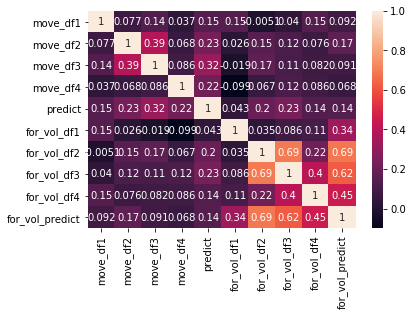

In [16]:
corrMatrix = last_forward_test.corr()
sn.heatmap(corrMatrix, annot=True)

In [17]:
x = last_forward_test[['for_vol_df1','for_vol_df2', 'for_vol_df3', 'for_vol_df4']].values
y = last_forward_test['for_vol_predict'].values

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

new_model = LinearRegression()
new_model.fit(x_poly, y)
y_poly_pred = new_model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


0.00037839658792499696
0.7484829071991068


In [18]:
rate_convert(.00038)

0.61

In [19]:
X = last_forward_test[['for_vol_df1','for_vol_df2', 'for_vol_df3', 'for_vol_df4']].values
y = last_forward_test['for_vol_predict'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', regressor.score(X_test, y_test))

Mean Absolute Error: 0.000318035223010997
Mean Squared Error: 1.7071432191084923e-07
Root Mean Squared Error: 0.0004131758970594113
R2: 0.7109884777689814


In [20]:
last_row = last_forward_test.tail(1)

In [21]:
test_input = last_row[['for_vol_df1','for_vol_df2', 'for_vol_df3', 'for_vol_df4']].values
test_input

array([[0.00304335, 0.00242915, 0.003659  , 0.00331093]])

In [22]:
regressor.predict(test_input)

array([0.00231072])

In [23]:
rate_convert

<function __main__.rate_convert(rate, period=255)>

In [24]:
polynomial_features=PolynomialFeatures(degree=2)
x_test_poly = polynomial_features.fit_transform(test_input)
new_model.predict(x_test_poly)

array([0.0024671])

In [25]:
polynomial_features=PolynomialFeatures(degree=2)
x_test_poly = polynomial_features.fit_transform(test_input)
new_model.predict(x_test_poly)

array([0.0024671])

In [26]:
rate_convert(.0028171753)

4.5

In [27]:
eu_vol = vol_convert(4.25)
jpy_vol = vol_convert(4.75)
bp_vol = vol_convert(7)
au_vol = vol_convert(4.47)
ca_vol = vol_convert(4)

In [28]:
print(eu_vol)
print(jpy_vol)
print(bp_vol)
print(au_vol)
print(ca_vol)

0.002661
0.002975
0.004384
0.002799
0.002505


In [29]:
newest_test = [[jpy_vol, ca_vol, au_vol, bp_vol]]

In [30]:
polynomial_features=PolynomialFeatures(degree=2)
x_test_poly = polynomial_features.fit_transform(newest_test)
new_model.predict(x_test_poly)

array([0.00299304])

In [31]:
rate_convert(.0030)

4.79